# Casos da COVID-19 no Rio de Janeiro 
# Com Média Móvel - 7 dias

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

dados_total = pd.read_csv('C:/Users/Annie/Pictures/060720/dadocaso1.csv')
dados_total.data = pd.to_datetime(dados_total.data) #Transformou o dado em data
dados_total.set_index('data',inplace = True) #Tornou a data como índice
dados_total.head()

,casos
data,
2020-02-15,4
2020-02-16,1
2020-02-17,4
2020-02-18,3
2020-02-19,6


In [2]:
dados = dados_total.rolling(window=7).mean() #Janela de 7 dias
dados.tail()

,casos
data,
2020-06-26,508.428571
2020-06-27,430.428571
2020-06-28,411.428571
2020-06-29,393.571429
2020-06-30,364.714286


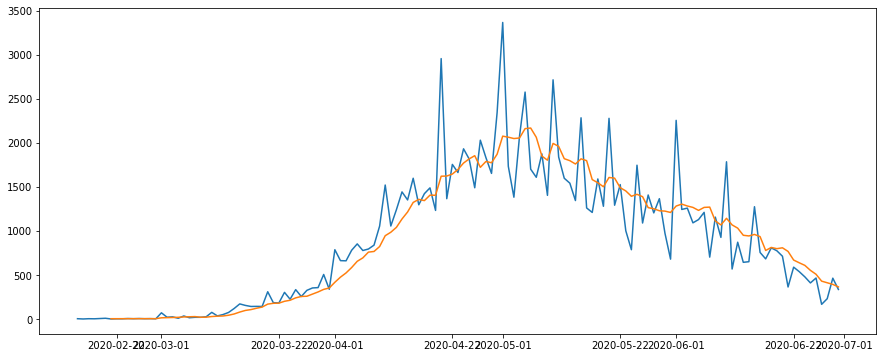

In [3]:
plt.figure(figsize = (15,6))
plt.plot(dados_total)
plt.plot(dados)

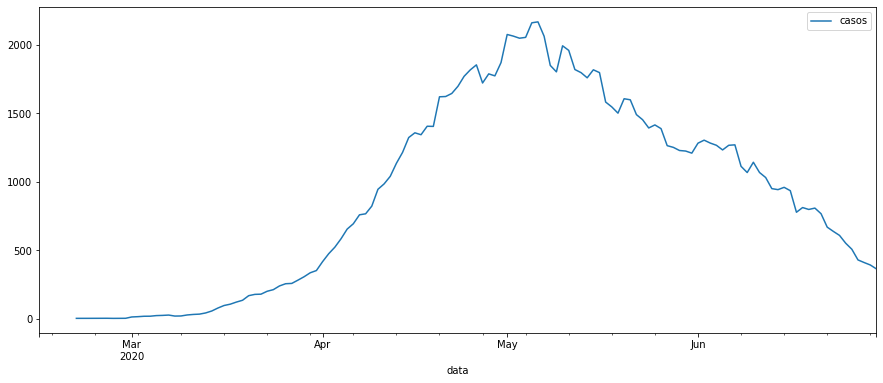

In [4]:
dados.plot(figsize = (15,6)) 

# Analisar a Tendência

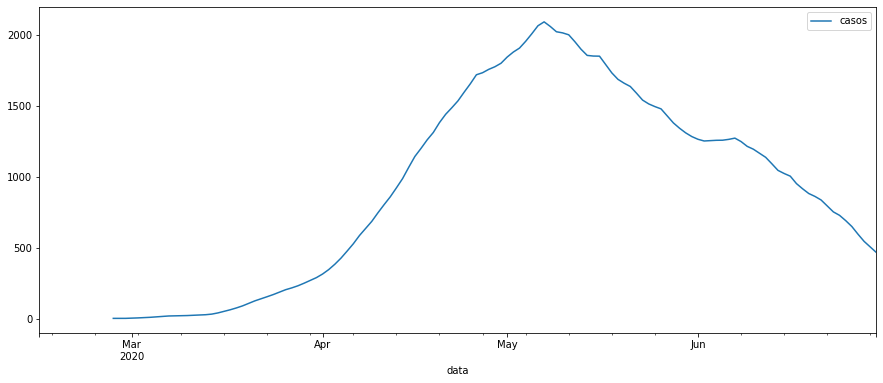

In [5]:
dados.rolling(7).mean().plot(figsize = (15,6)) #Período de 7 por ser dia da semana

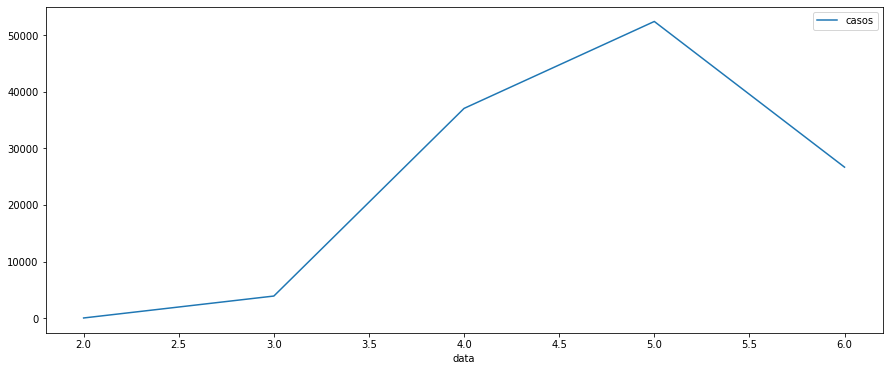

In [6]:
dados.groupby(dados.index.month).sum().plot(figsize = (15,6)) #Agrupando por mês

# Sazonalidade

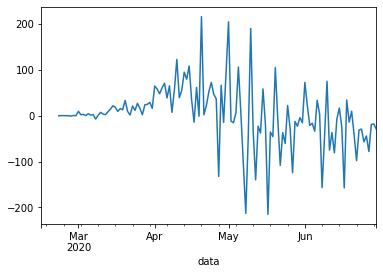

In [7]:
dados.casos.diff() #Diferença da quantidade do dia anterior
dados.casos.diff().plot()

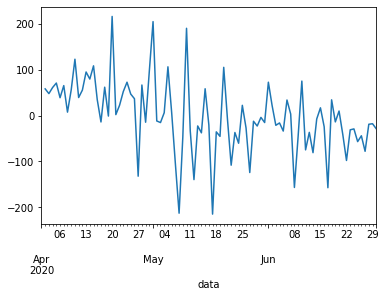

In [8]:
filtro = (dados.index.month >= 4) #Filtro de abril em diante
dados[filtro].casos.diff().plot() #Analisar os picos

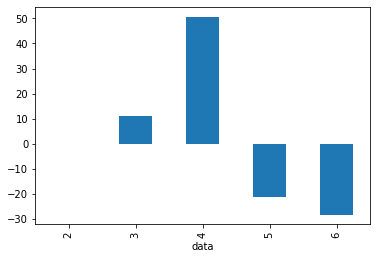

In [9]:
dados.casos.groupby(dados.index.month).mean()
dados.casos.diff().groupby(dados.index.month).mean().plot(kind = 'bar') #Dos meses

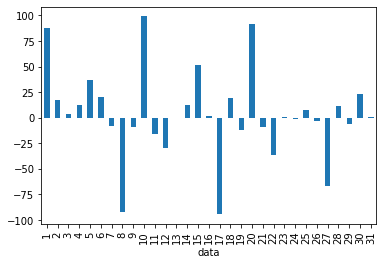

In [10]:
dados.casos.diff().groupby(dados.index.day).mean().plot(kind = 'bar') #Dias

# Modelo Preditivo:
# Modelo Naive

In [11]:
dados['naive'] = dados.casos.shift(1) #Modelo básico usa como previsão o dado do dia anterior
dados.head()

,casos,naive
data,,
2020-02-15,NaN,NaN
2020-02-16,NaN,NaN
2020-02-17,NaN,NaN
2020-02-18,NaN,NaN
2020-02-19,NaN,NaN


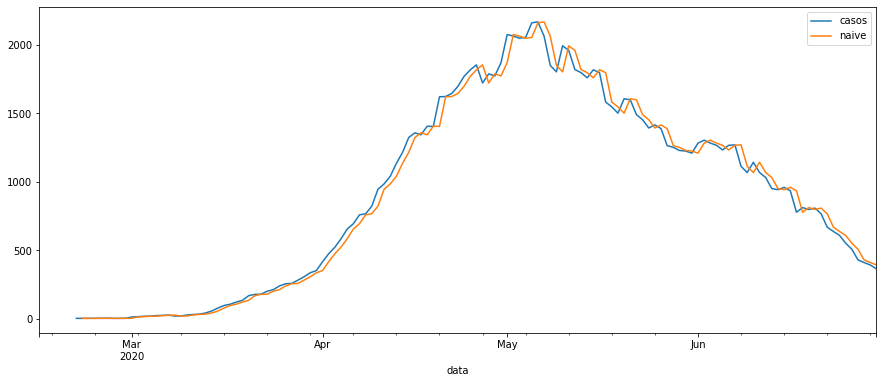

In [12]:
dados.plot(figsize = (15,6))

In [13]:
import numpy as np #MAPE 

def mean_absolute_percentage_error(y_true, y_pred): 
    # y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) /(y_true))) * 100



In [14]:
((dados.casos - dados.naive)**2).mean() #Calculo do erro médio ao quadrado 
mean_absolute_percentage_error(dados.casos, dados.naive)

7.324736622936101

# Modelo AutoRegressor (AR)

# Lag = 1

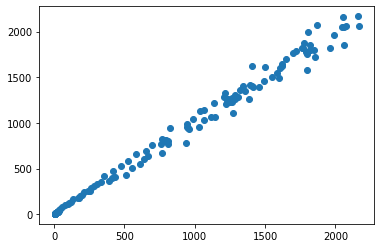

In [15]:
dados['x1']= dados.casos.shift(1) #Caso anterio = 1
dados.dropna(axis = 0, inplace = True) #Removendo as linhas nulas, pois o modelo não aceita
plt.scatter(dados.x1, dados.casos) #Gráfico de dispersão, para verificar se são lineares

In [16]:
#Com LAG = 1
from sklearn.linear_model import LinearRegression
X = dados.x1.values #Transformando em vetor 
y = dados.casos.values #Transformando em vetor
regressao = LinearRegression().fit(X.reshape(-1,1),y)
previsoes = regressao.predict(X.reshape(-1,1))
((y - previsoes)**2).mean() #Calculando o erro

4220.771866039641

Text(0, 0.5, 'Casos')

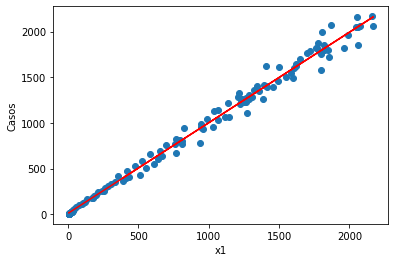

In [17]:
plt.scatter(X,y)
plt.plot(X, previsoes, color='red')
plt.xlabel('x1')
plt.ylabel('Casos')

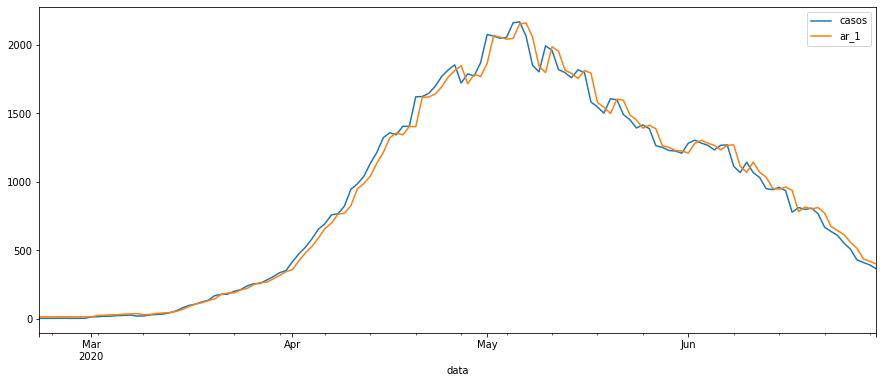

In [18]:
dados['ar_1']= previsoes
dados[['casos','ar_1']].plot(figsize = (15,6))

# Lag = 2

In [19]:
from statsmodels.tsa.ar_model import AR #O mesmo processo mais acelerado
ar_2 = AR(dados.casos, freq = 'D').fit(2) #Frequência de dias 
((ar_2.resid)**2).mean()

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


4028.560866482801

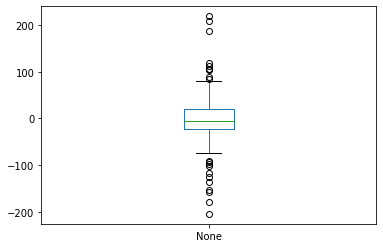

In [20]:
ar_2.resid.plot(kind = 'box') #boxplot. Analisando a distribuição do erro

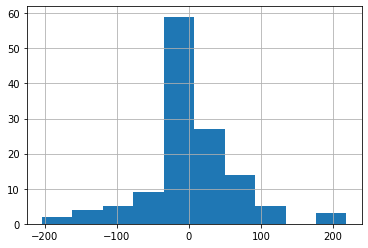

In [21]:
ar_2.resid.hist() #Analisando a distribuição do erro

# Lag = 3

In [22]:
from statsmodels.tsa.ar_model import AR #O mesmo processo mais acelerado
ar_3 = AR(dados.casos, freq = 'D').fit(3) #Frequência de dias 
((ar_3.resid)**2).mean()

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


4046.6432921223713

In [23]:
ar_3.predict(start = '2020-07-01', end = '2020-07-01') #Previsão de um dia

2020-07-01    365.891433
Freq: D, dtype: float64

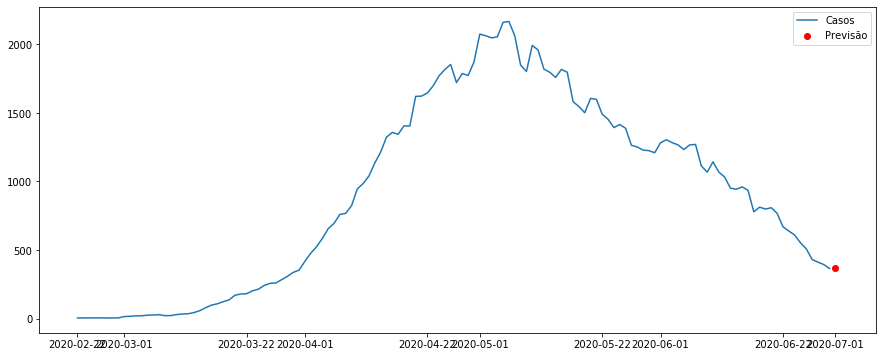

In [24]:
plt.figure(figsize = (15,6))
plt.plot(dados.casos)
forecast = ar_3.predict(start = '2020-07-01', end = '2020-07-01')
plt.scatter(forecast.index, forecast.values, color = 'red')
plt.legend(['Casos','Previsão'])

# Autocorrelação Total e Parcial

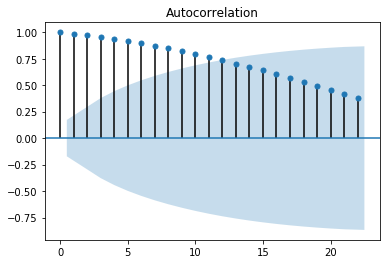

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(dados.casos) #Total
plt.show()

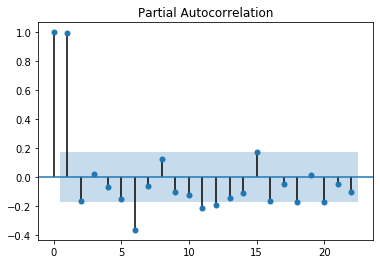

In [26]:
plot_pacf(dados.casos) #Parcial
plt.show()

# Validação Train/Test

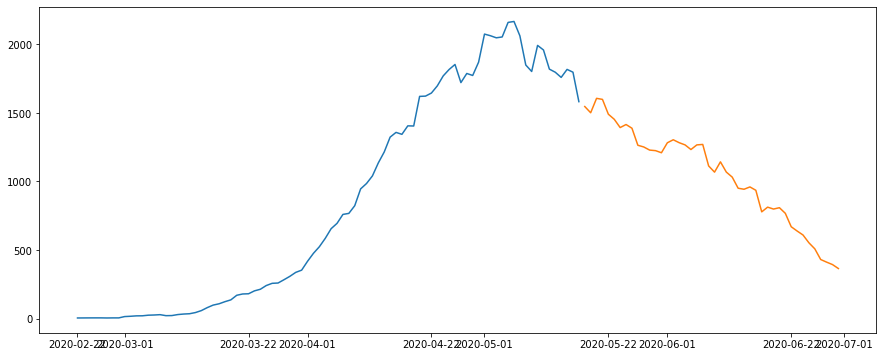

In [27]:
train_size = int(len(dados.casos)*2/3)
train_set = dados.casos[:train_size] #Dados para treino
test_set = dados.casos[train_size:] #Dados para teste
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


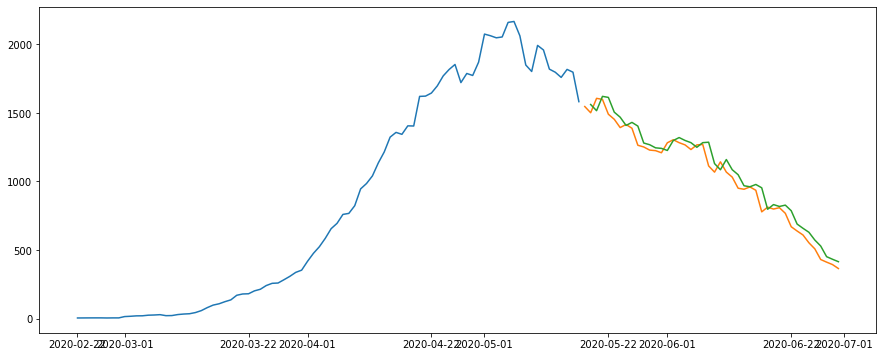

In [28]:
from statsmodels.tsa.ar_model import AR
ar_1 = AR(train_set, freq = 'D').fit(1)
#Função com lag = 1
previsao_1 = ar_1.params[0] + ar_1.params[1]*test_set.shift(1) 
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao_1) #Verde

In [29]:
((test_set - previsao_1)**2).mean()
mean_absolute_percentage_error(test_set, previsao_1)

6.532371255023234

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


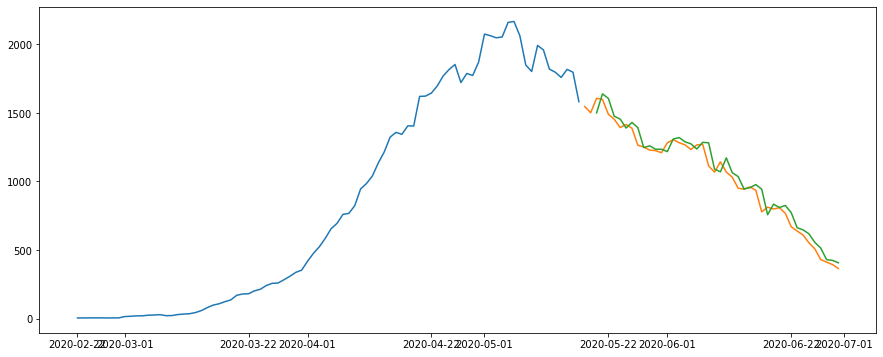

In [30]:
#Com t-2
from statsmodels.tsa.ar_model import AR
ar_2 = AR(train_set, freq = 'D').fit(2)
#Função com lag = 2 
previsao_2 = ar_2.params[0] + ar_2.params[1]*test_set.shift(1) +  ar_2.params[2]*test_set.shift(2)
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao_2) #Verde

In [31]:
((test_set - previsao_2)**2).mean()
mean_absolute_percentage_error(test_set, previsao_2)

5.751663618557531

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


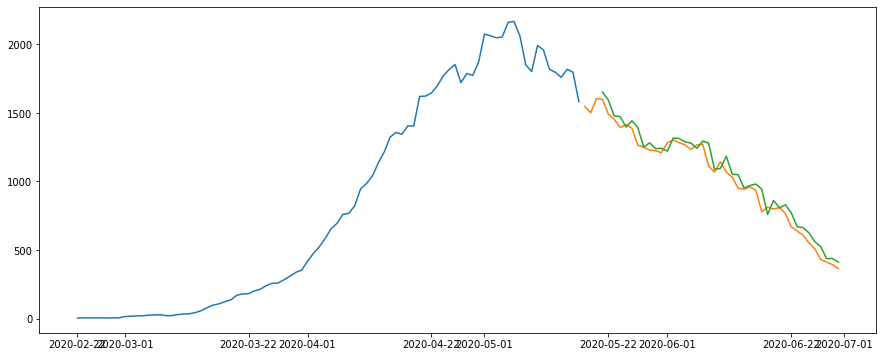

In [32]:
#Com t-3
from statsmodels.tsa.ar_model import AR
ar_3 = AR(train_set, freq = 'D').fit(3)
#Função com lag = 3
previsao_3 = ar_3.params[0]
for i, coef in enumerate(ar_3.params[1:]):
    previsao_3 += coef * test_set.shift(i + 1)
#Gráfico
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao_3) #Verde, sem 3 dias divido ao modelo  

In [33]:
((test_set - previsao_3)**2).mean() #Erro de t-3 
mean_absolute_percentage_error(test_set, previsao_3)

6.321043298534924

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


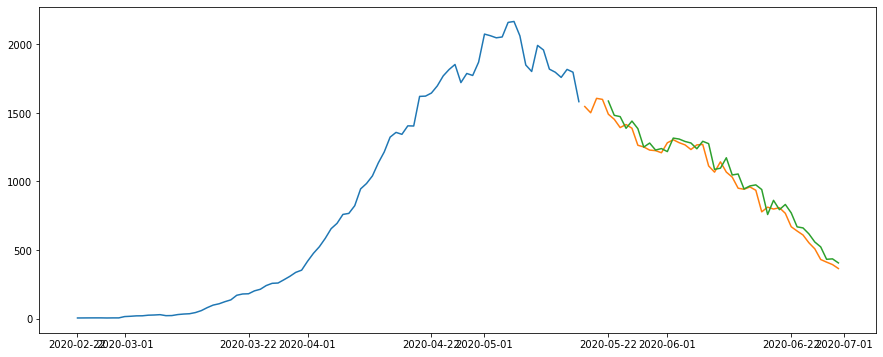

In [34]:
#Com t-4
from statsmodels.tsa.ar_model import AR
ar_4 = AR(train_set, freq = 'D').fit(4)
#Função com lag = 4
previsao_4 = ar_4.params[0]
for i, coef in enumerate(ar_4.params[1:]):
    previsao_4 += coef * test_set.shift(i + 1)
#Gráfico
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao_4) #Verde, sem 4 dias divido ao modelo   

In [35]:
((test_set - previsao_4)**2).mean()
mean_absolute_percentage_error(test_set, previsao_4)

6.157145863210291

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


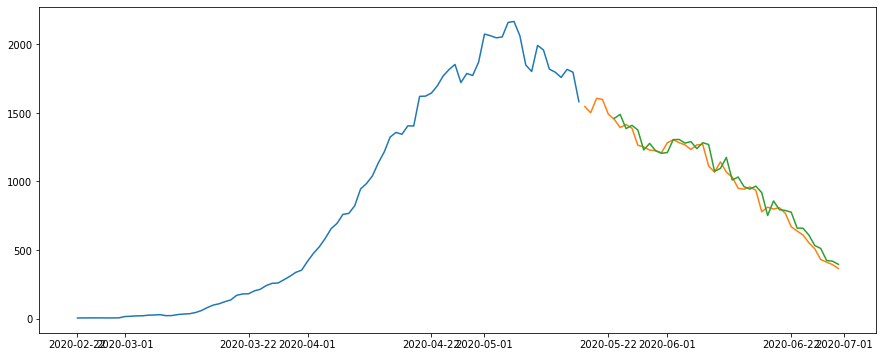

In [36]:
#Com t-5
from statsmodels.tsa.ar_model import AR
ar_5 = AR(train_set, freq = 'D').fit(5)
#Função com lag = 5
previsao_5 = ar_5.params[0]
for i, coef in enumerate(ar_5.params[1:]):
    previsao_5 += coef * test_set.shift(i + 1)
#Gráfico
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao_5) #Verde, sem 5 dias divido ao modelo   

In [37]:
((test_set - previsao_5)**2).mean()
mean_absolute_percentage_error(test_set, previsao_5)

5.245257711677445

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


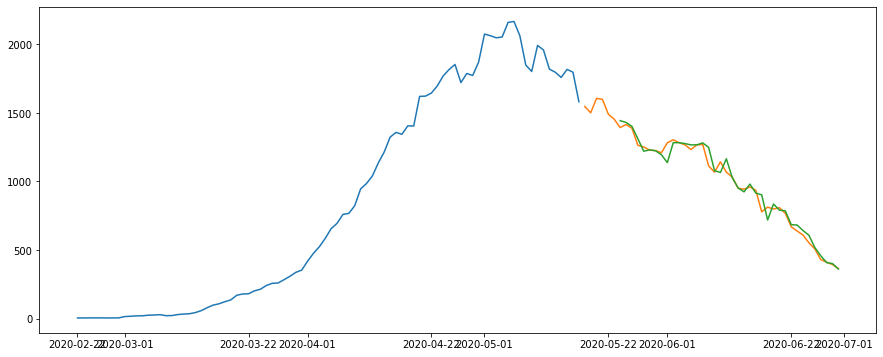

In [38]:
#Com t-6
from statsmodels.tsa.ar_model import AR
ar_6 = AR(train_set, freq = 'D').fit(6)
#Função com lag = 6
previsao_6 = ar_6.params[0]
for i, coef in enumerate(ar_6.params[1:]):
    previsao_6 += coef * test_set.shift(i + 1)
#Gráfico
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao_6) #Verde, sem 6 dias divido ao modelo 

In [39]:
((test_set - previsao_6)**2).mean()
mean_absolute_percentage_error(test_set, previsao_6)

3.6756933040934103

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


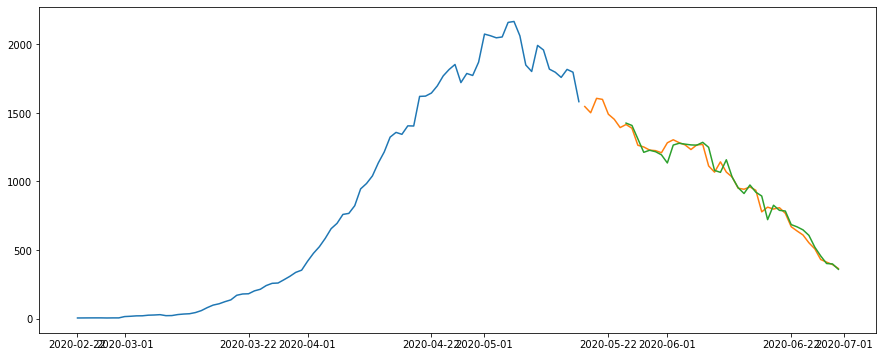

In [40]:
#Com t-7
from statsmodels.tsa.ar_model import AR
ar_7 = AR(train_set, freq = 'D').fit(7)
#Função com lag = 7
previsao_7 = ar_7.params[0]
for i, coef in enumerate(ar_7.params[1:]):
    previsao_7 += coef * test_set.shift(i + 1)
#Gráfico
plt.figure(figsize = (15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsao_7) #Verde, sem 7 dias divido ao modelo  

In [41]:
((test_set - previsao_7)**2).mean()
mean_absolute_percentage_error(test_set, previsao_7)

3.6877390112669675

# Modelo AutoRegrssivo de Médias Moveis (ARMA)

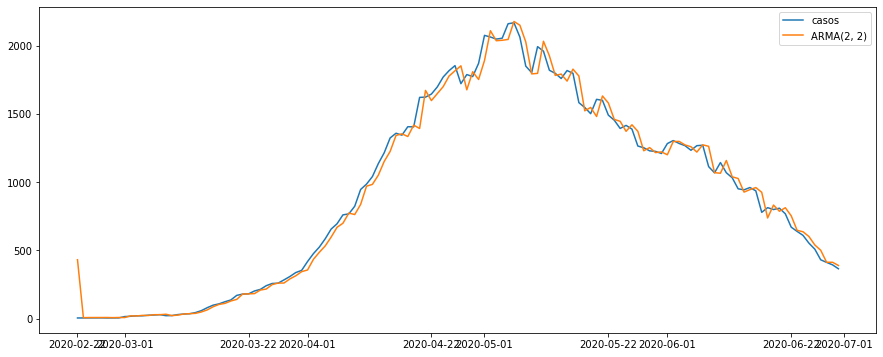

In [42]:
from statsmodels.tsa.arima_model import ARMA
arma = ARMA(dados.casos, freq = 'D', order = (1,2)).fit()
plt.figure(figsize = (15,6))
plt.plot(dados.casos)
plt.plot(arma.predict())
plt.legend(['casos', 'ARMA(2, 2)'])

In [43]:
#Para validar (1,1)
n = len(dados.casos)
train_size = int(n*2/3)
train_set = dados.casos[:train_size]
test_set = dados.casos[train_size:]
arma11_train = ARMA(train_set, freq = 'D', order = (1,1)).fit()
arma11_train.params
arma11_test = ARMA(test_set, freq = 'D', order = (1,1)).fit(arma11_train.params)
(arma11_test.resid ** 2).mean()

10881.68945572964

In [44]:
#Para validar (1,2)
n = len(dados.casos)
train_size = int(n*2/3)
train_set = dados.casos[:train_size]
test_set = dados.casos[train_size:]
arma12_train = ARMA(train_set, freq = 'D', order = (1,2)).fit()
arma12_train.params
arma12_test = ARMA(test_set, freq = 'D', order = (1,2)).fit(arma12_train.params)
(arma12_test.resid ** 2).mean()

10849.448097695406

In [45]:
configs = [(1,1),(1,2),(1,3),(1,4),(1,5),(1,6),(3,0),(2,0)] #Os testes que não geraram erro
best = 100000
for config in configs:
    arma = ARMA(train_set, freq = 'D', order = config).fit()
    arma_test = ARMA(test_set,freq = 'D', order = config).fit(arma.params)
    erro = np.mean(np.abs((arma_test.resid) /(test_set))) * 100
    print(config,erro) 

(1, 1) 5.634512801955405
(1, 2) 5.744912764713195
(1, 3) 5.719803138902526
(1, 4) 5.046374564355698


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 5) 4.601147547763351


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 6) 4.390640995096814
(3, 0) 5.685637241195455
(2, 0) 5.611600508065202


# Modelo Integrado AutoRegressivo de Média Móveis (ARIMA)

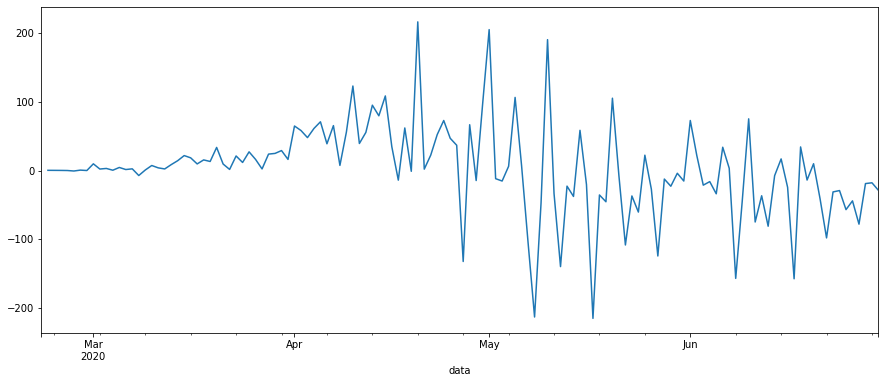

In [46]:
dados.casos.diff().plot(figsize=(15,6))

In [47]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(dados.casos, freq='D', order=(5,1,2)).fit()
(arima.resid**2).mean()

2706.999942626586

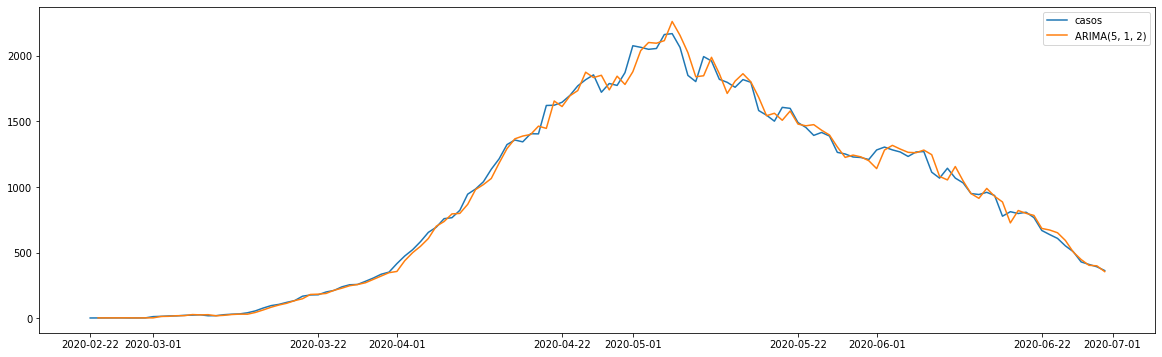

In [48]:
plt.figure(figsize=(20, 6))
plt.plot(dados.casos)
plt.plot(arima.predict(typ='levels')) #typ é usado para reverter o diff
plt.legend(['casos', 'ARIMA(5, 1, 2)'])

In [49]:
arima.forecast()[0]

array([329.05630706])

In [50]:
orders = [(1,1,1),(1,1,2),(1,2,2),(2,1,1),(2,2,1),(2,1,2),(2,2,2),(3,1,1),(3,1,2),(3,2,2),(3,2,1),(3,2,3),(3,1,3),(3,3,3),(4,2,2),(5,2,3),(4,1,1),(5,1,1),(6,1,1)]
best = 10000
for order in orders:
    try:
        model_train = ARIMA(train_set, freq='D', order=order).fit()
        model_test = ARIMA(test_set, freq='D', order=order).fit(model_train.params)
        #erro = (model_test.resid ** 2).mean()
        erro = np.mean(np.abs((model_test.resid ) /(test_set))) * 100
        print(f'ARIMA{order} = {erro}')

    except:
        pass

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.p

ARIMA(1, 1, 1) = 3.8335713836020595


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2) = 3.9141616094066487
ARIMA(1, 2, 2) = 4.0364438974021475


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(2, 1, 1) = 52.596340502166186
ARIMA(2, 2, 1) = 4.286033043953301
ARIMA(2, 2, 2) = 4.2473151744602875


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(3, 1, 1) = 3.970875678061124


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\tsatools.py:714: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


ARIMA(3, 2, 2) = 4.629418390931147
ARIMA(3, 2, 1) = 4.226922986128866


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(3, 2, 3) = 4.672424642743789


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


ARIMA(4, 2, 2) = 4.496086680825825


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 2, 3) = 4.6847284107843015
ARIMA(4, 1, 1) = 3.9035048440041873
ARIMA(5, 1, 1) = 3.5820301945223427
ARIMA(6, 1, 1) = 3.504004409052542


In [79]:
#O MELHOR RESULTADO
model_train = ARIMA(train_set, freq='D', order=(6,1,1)).fit()
model_test = ARIMA(test_set, freq='D', order=(6,1,1)).fit(model_train.params)
erro = np.mean(np.abs((model_test.resid ) /(test_set))) * 100

In [80]:
model_test.predict(typ='levels',start='2020-07-01', end='2020-07-01')

2020-07-01    318.74469
Freq: D, dtype: float64

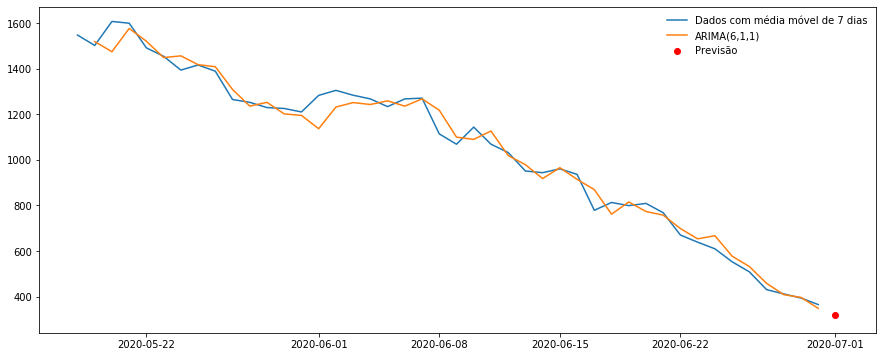

In [81]:
plt.figure(figsize=(15, 6))
plt.plot(test_set)
plt.plot(model_test.predict(typ='levels'))
forecast = model_test.predict(typ='levels',start='2020-07-01', end='2020-07-01')
plt.scatter(forecast.index, forecast.values, color='red')
plt.legend(['Dados com média móvel de 7 dias','ARIMA(6,1,1)', 'Previsão'], frameon=False)

# Modelo AutoRegressivo Sazonal de Média Móveis Integrado (SARIMA)

data
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
Name: casos, dtype: object

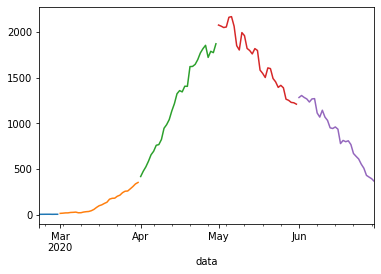

In [51]:
dados.casos.groupby(dados.index.month).plot() #Cada mês

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(dados.casos, freq='D', order=(2, 1, 2), seasonal_order=(3, 1, 2, 12)).fit()
(sarima.resid ** 2).mean()

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3673.280693608673

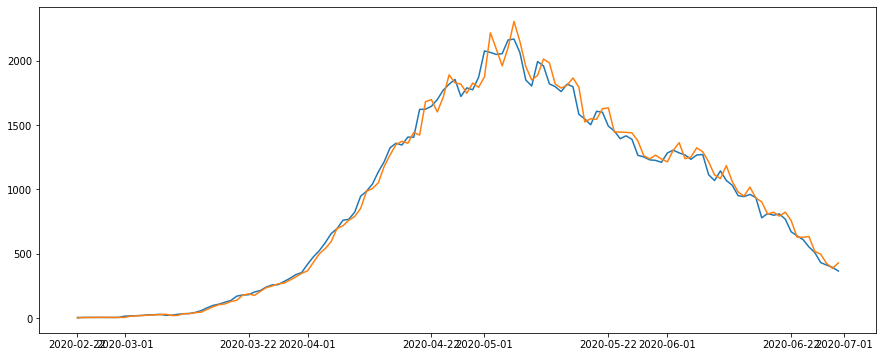

In [53]:
plt.figure(figsize=(15, 6))
plt.plot(dados.casos)
plt.plot(sarima.predict(typ='levels'))

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
orders = [(1,1,1,12),(1,1,2,12),(1,2,2,12),(2,1,1,12),(2,2,1,12),(2,1,2,12),(2,2,2,12),(3,1,1,12),(3,1,2,12),(3,2,2,12),(3,2,1,12),(3,2,3,12),(3,1,3,12),(3,3,3,12),(4,2,2,12),(5,2,3,12)]
best = 10000
for order in orders:
    try:
        model_train = SARIMAX(train_set, freq='D', order=(1, 1, 2), seasonal_order= order).fit()
        model_test = SARIMAX(test_set, freq='D', order=(1, 1, 2), seasonal_order= order).fit(model_train.params)
        #erro = (model_test.resid ** 2).mean()
        erro = np.mean(np.abs((model_test.resid ) /(test_set))) * 100
        print(f'SARIMA{order} = {erro}')

    except:
        pass

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Like

SARIMA(1, 1, 1, 12) = 9.136543914290277


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:901: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\Annie\anaconda3\cc\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWar

SARIMA(1, 1, 2, 12) = 9.231856804503602


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2, 12) = 13.96898076638114


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1, 12) = 9.004533163649619


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1, 12) = 14.13300287015417


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2, 12) = 9.240644157578991


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2, 12) = 14.146499958332596


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1, 12) = 9.007127669741482


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2, 12) = 9.006345171873907


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 2, 12) = 14.172005139015695


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 1, 12) = 14.133855833482903


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3, 12) = 14.057881855591258


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3, 12) = 9.23454444144241


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 3, 12) = 17.62731596013066


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(4, 2, 2, 12) = 14.179897874594182


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
orders = [(1,1,1,12),(1,1,2,12),(1,2,2,12),(2,1,1,12),(2,2,1,12),(2,1,2,12),(2,2,2,12),(3,1,1,12),(3,1,2,12),(3,2,2,12),(3,2,1,12),(3,2,3,12),(3,1,3,12),(3,3,3,12),(4,2,2,12),(5,2,3,12)]
best = 10000
for order in orders:
    try:
        model_train = SARIMAX(train_set, freq='D', order=(3, 1, 1), seasonal_order= order).fit()
        model_test = SARIMAX(test_set, freq='D', order=(3, 1, 1), seasonal_order= order).fit(model_train.params)
        #erro = (model_test.resid ** 2).mean()
        erro = np.mean(np.abs((model_test.resid ) /(test_set))) * 100
        print(f'SARIMA{order} = {erro}')

    except:
        pass

C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1, 12) = 9.14489045033715


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2, 12) = 9.087005159920485


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2, 12) = 13.980601905462194


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1, 12) = 9.04028468379762


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1, 12) = 13.961784115469374


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2, 12) = 9.271868380441926


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2, 12) = 13.98708987917182


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1, 12) = 9.206685062828903


C:\Users\Annie\anaconda3\cc\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
orders = [(1,1,1,12),(1,1,2,12),(1,2,2,12),(2,1,1,12),(2,2,1,12),(2,1,2,12),(2,2,2,12),(3,1,1,12),(3,1,2,12),(3,2,2,12),(3,2,1,12),(3,2,3,12),(3,1,3,12),(3,3,3,12),(4,2,2,12),(5,2,3,12)]
best = 10000
for order in orders:
    try:
        model_train = SARIMAX(train_set, freq='D', order=(2, 1, 1), seasonal_order= order).fit()
        model_test = SARIMAX(test_set, freq='D', order=(2, 1, 1), seasonal_order= order).fit(model_train.params)
        erro = (model_test.resid ** 2).mean()
        print(f'SARIMA{order} = {erro}')

    except:
        pass

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
orders = [(1,1,1,12),(1,1,2,12),(1,2,2,12),(2,1,1,12),(2,2,1,12),(2,1,2,12),(2,2,2,12),(3,1,1,12),(3,1,2,12),(3,2,2,12),(3,2,1,12),(3,2,3,12),(3,1,3,12),(3,3,3,12),(4,2,2,12),(5,2,3,12)]
best = 10000
for order in orders:
    try:
        model_train = SARIMAX(train_set, freq='D', order=(1, 1, 1), seasonal_order= order).fit()
        model_test = SARIMAX(test_set, freq='D', order=(1, 1, 1), seasonal_order= order).fit(model_train.params)
        erro = (model_test.resid ** 2).mean()
        print(f'SARIMA{order} = {erro}')

    except:
        pass

In [ ]:
sarima.forecast()[0]

# Modelos com Variáveis Exogenas

In [ ]:
p = 5
dados1 = dados.copy()
for i in range(p):
    dados1[f'x_{i+1}'] = dados1.casos.shift(i + 1)
dados1.dropna(axis=0, inplace=True)
dados1.head()

# Árvore de Regressão

In [ ]:
X = dados1.drop('casos', axis=1) 
y = dados1.casos

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X, y)

plt.figure(figsize=(15, 5))
plt.plot(dados1.casos.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto']) 

In [ ]:
reg = DecisionTreeRegressor(max_depth=7) #Parâmetro para profundidade da árvore
reg.fit(X, y)

plt.figure(figsize=(15, 5))
plt.plot(dados1.casos.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto']) 

In [ ]:
dados1['month'] = dados1.index.month
dados1.head()

In [ ]:
X = dados1.drop('casos', axis=1)
y = dados1.casos
reg = DecisionTreeRegressor(max_depth=7)
reg.fit(X, y)
plt.figure(figsize=(15, 5))
plt.plot(dados1.casos.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto'])

In [ ]:
#Com validação
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=7)
reg.fit(X_train, y_train)

((y_test - reg.predict(X_test)) ** 2).mean()

In [ ]:
p = 3 #Número de lags a considerar
max_depth = 7

dados1 = dados[['casos']].copy()
for i in range(p):
    dados1[f'x_{i+1}'] = dados1.casos.shift(i + 1)
dados1.dropna(axis=0, inplace=True)
dados1['month'] = dados1.index.month

X = dados1.drop('casos', axis=1)
y = dados1.casos
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=max_depth)
reg.fit(X_train, y_train)
((y_test - reg.predict(X_test)) ** 2).mean()

In [ ]:
dados1.tail() 

In [ ]:
periodo_futuro = dados1.index[-1] + np.timedelta64(1, 'D')
X_new = [list(np.flip(dados1.casos.tail(p).values, axis=0)) + [periodo_futuro.month]]
X_new

In [ ]:
reg.predict(X_new)

In [ ]:
plt.figure(figsize=(15 ,5))
plt.plot(y_test.values)
plt.plot(reg.predict(X_test))